# Reliance Industries Stock Forecast
Business Objective :


Predicting the Reliance Industries Stock Price for the next 30 days

In [1]:
#!pip install --upgrade pandas-datareader

# Import Necessary Libraries

In [2]:
import pandas_datareader
pandas_datareader.__version__ 

'0.10.0'

In [3]:
#import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yfin
import warnings
warnings.filterwarnings('ignore')

# Import The Dataset

In [4]:
#load Dataset
yfin.pdr_override() #to prevent the error
from pandas_datareader import data as pdr

In [5]:
df = pdr.get_data_yahoo('RELIANCE.NS', start='2015-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720
2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882568,3383424
2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316254,4662967
2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603485,8596809
2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171326,9562421


# Exploratory Data Analysis (EDA)

# Data understanding & Checking missing/null values

In [6]:
#Checking the size of data set
df.shape

(1978, 6)

In [7]:
#checking the null values in dataset
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#Removing the null values in dataset
df=df.dropna()

In [9]:
#checking the null values in dataset
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
#Summarizing the overall dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1978 entries, 2015-01-01 to 2023-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1978 non-null   float64
 1   High       1978 non-null   float64
 2   Low        1978 non-null   float64
 3   Close      1978 non-null   float64
 4   Adj Close  1978 non-null   float64
 5   Volume     1978 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 108.2 KB


In [11]:
#Checking the duplicate values
df.duplicated().sum()

0

In [12]:
#Statistical description of data 
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1.978000e+03
mean,1317.057089,1332.054319,1301.444639,1316.153192,1301.726960,9.082139e+06
std,752.857211,761.142485,744.054258,752.267509,756.468832,6.693356e+06
min,404.466064,405.010895,394.485657,401.568542,381.669678,7.871600e+05
25%,530.304504,537.368774,526.168716,532.149506,516.246933,5.241742e+06
50%,1175.333984,1189.400696,1152.277588,1173.154663,1155.797180,7.145791e+06
75%,2048.037537,2068.737488,2006.725037,2036.837494,2029.129181,1.024505e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1978 entries, 2015-01-01 to 2023-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1978 non-null   float64
 1   High       1978 non-null   float64
 2   Low        1978 non-null   float64
 3   Close      1978 non-null   float64
 4   Adj Close  1978 non-null   float64
 5   Volume     1978 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 108.2 KB


In [14]:
df=df.drop(['Adj Close','Volume'], axis=1)

In [15]:
df

,Open,High,Low,Close
Date,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311
2015-01-02,439.880371,443.818054,437.998199,438.617340
2015-01-05,438.344940,441.267212,432.946106,433.812897
2015-01-06,430.915344,432.401276,412.093750,414.124512
2015-01-07,414.619812,425.367950,414.570282,423.139069
...,...,...,...,...
2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951
2022-12-29,2527.000000,2548.899902,2525.500000,2543.300049
2022-12-30,2545.100098,2577.000000,2541.100098,2547.199951


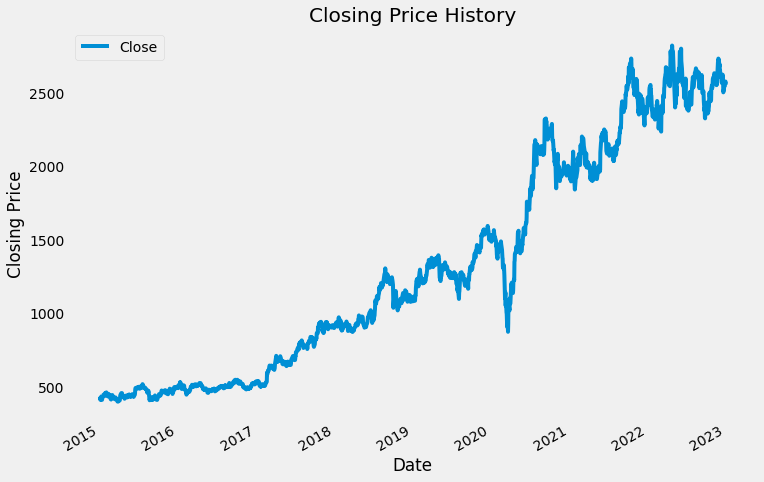

In [16]:
# Let's see a historical view of the closing price
plt.figure(figsize=(11, 8)) # resizing the plot
df['Close'].plot(legend=True)
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.grid()
plt.show()

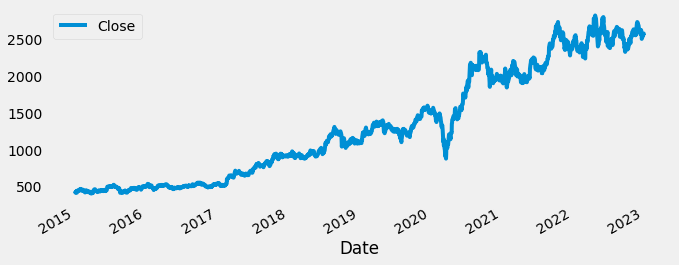

In [17]:
# Let's see a historical view of the closing price
df['Close'].plot(legend=True, figsize=(10,4))
plt.grid()

<AxesSubplot:>

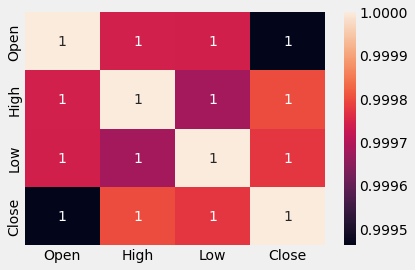

In [18]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True )

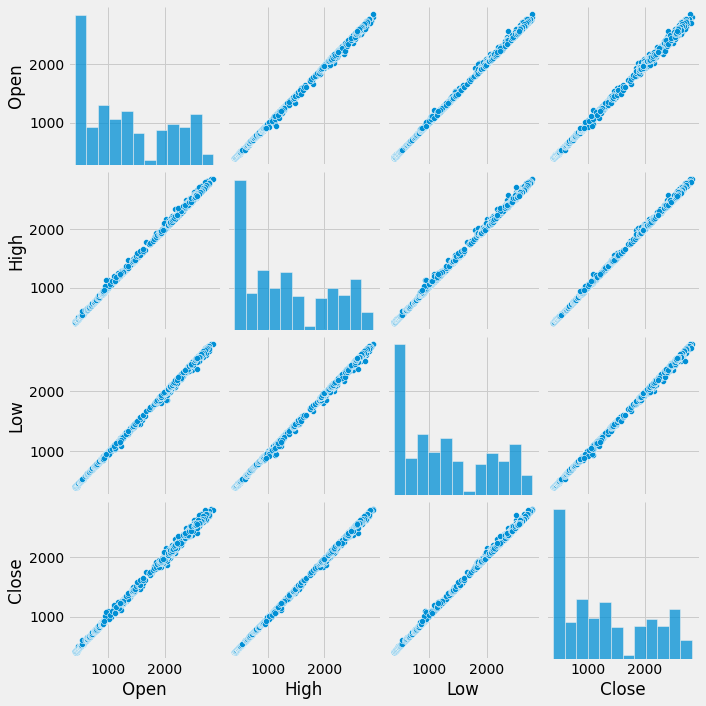

In [19]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Close'>

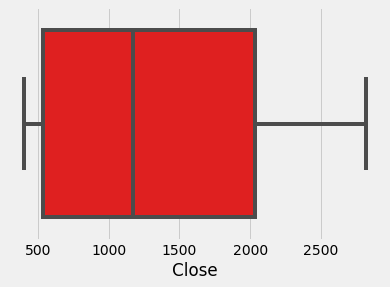

In [20]:
#using Boxplot
import seaborn as sns
sns.boxplot(df["Close"],color="red")

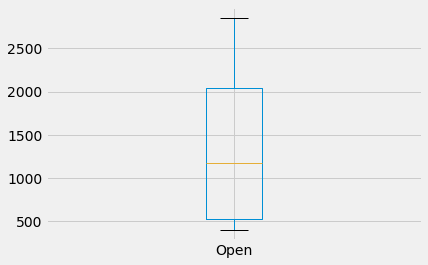

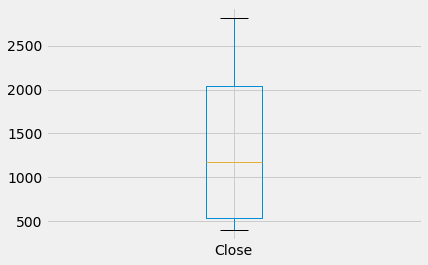

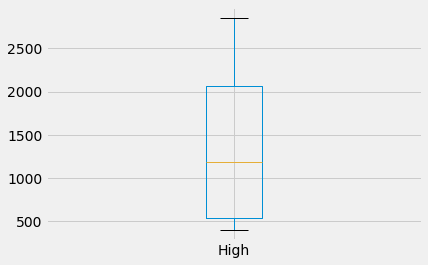

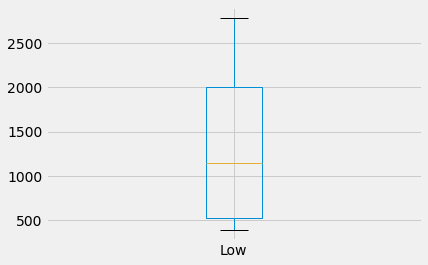

In [21]:
cols = ['Open', 'Close',"High","Low"]
for i in cols:
    plt.subplots()
    axes = df.boxplot(column= [i])
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

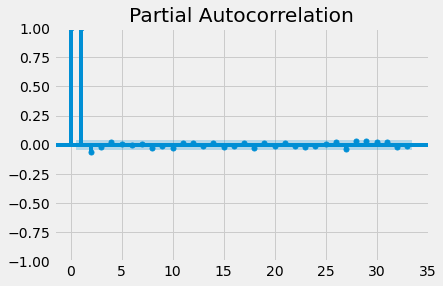

In [23]:
plot_pacf(df['High'])
plt.show()

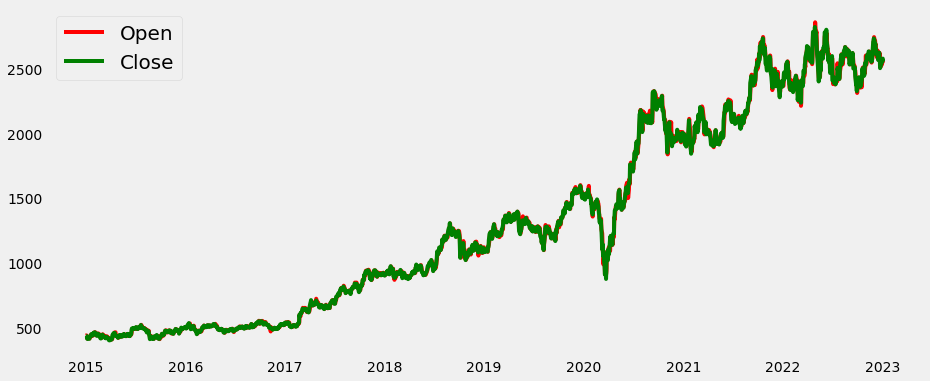

In [24]:
plt.figure(figsize=(14,6))
open_price, = plt.plot(df['Open'],color='red')
close, = plt.plot(df['Close'], color='green')
    
plt.legend(['Open', 'Close'], fontsize=20)
plt.grid()
plt.show()

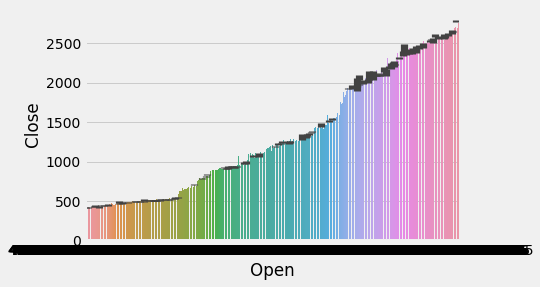

In [25]:
sns.barplot(x = 'Open', y = 'Close', data = df)
plt.show()

In [26]:
from pandas.plotting import lag_plot

Text(0.5, 1.0, 'Reliance Autocorrelation plot')

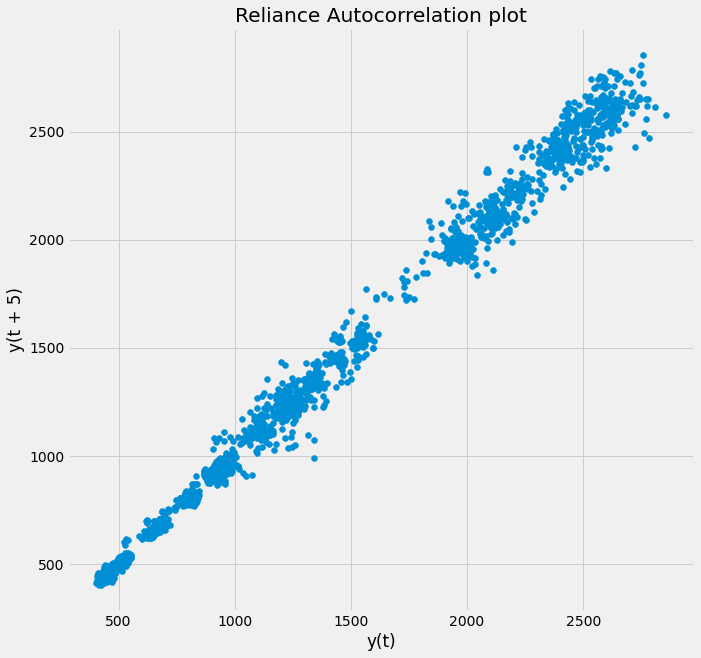

In [27]:

# We should check auto-correlation in the time series that means how the time is correlated with itself. If the time at t and t+1 are
# not correlated then there's a white noise in the data. Also, when we model a time-series the output error or residual will be stationary 
# and will look kind of white noise and then we know that our model is stationary and so time-series.
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Reliance Autocorrelation plot')

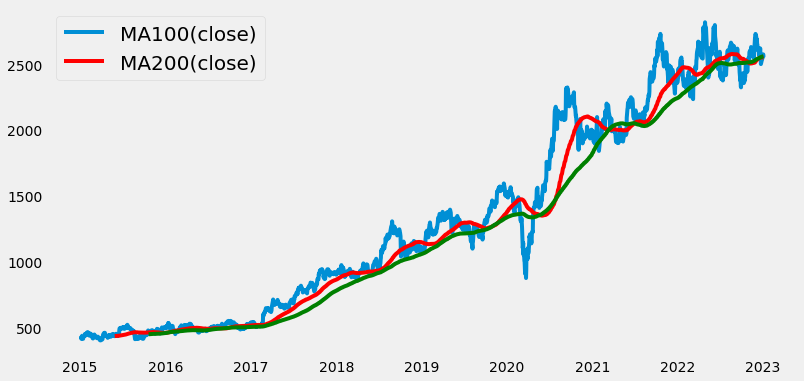

In [28]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.legend(['MA100(close)', 'MA200(close)'], fontsize=20)
plt.grid()

<AxesSubplot:>

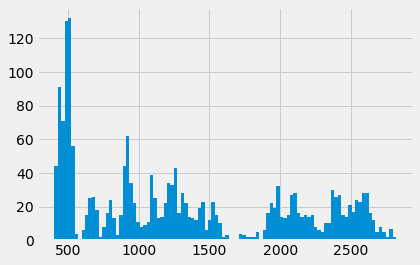

In [29]:
# only with histogram
df['Close'].hist(bins=100)

<AxesSubplot:xlabel='Close', ylabel='Density'>

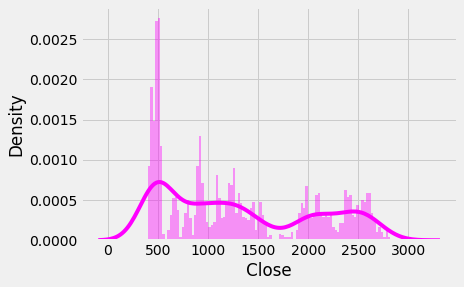

In [30]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(df['Close'].dropna(), bins=100, color='magenta')

In [31]:
ma_day = [10,20,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name] = df['Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

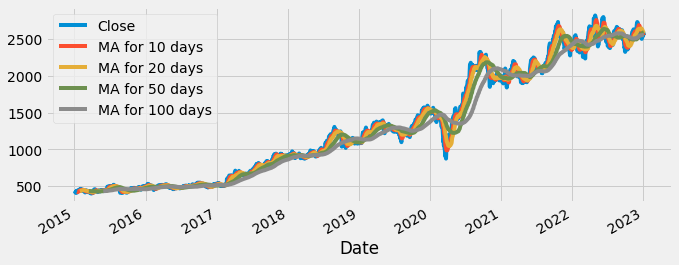

In [32]:
df[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

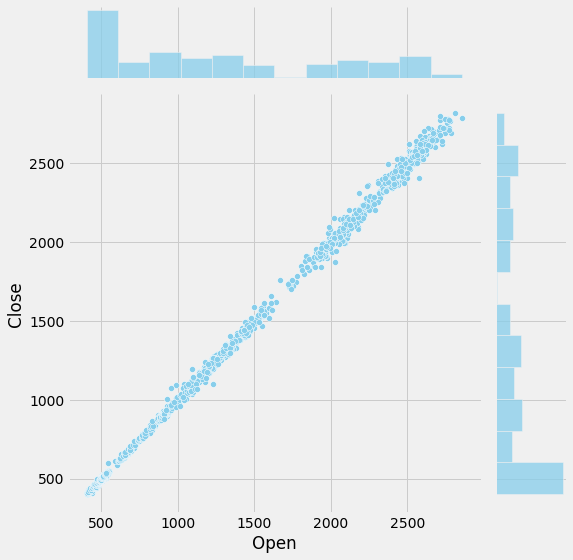

In [33]:
# We'll use joinplot to compare the daily returns of Date and Close.

sns.jointplot('Open','Close',df, kind='scatter',size=8, color='skyblue')

<AxesSubplot:>

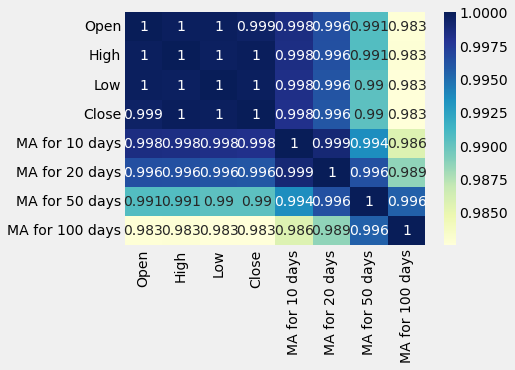

In [34]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily  of the stocks.
sns.heatmap(df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

                   Open         High          Low        Close  \
Date                                                             
2015-01-01   438.988831   441.812073   437.676270   439.781311   
2015-01-02   439.880371   443.818054   437.998199   438.617340   
2015-01-05   438.344940   441.267212   432.946106   433.812897   
2015-01-06   430.915344   432.401276   412.093750   414.124512   
2015-01-07   414.619812   425.367950   414.570282   423.139069   
...                 ...          ...          ...          ...   
2022-12-28  2538.000000  2549.800049  2521.500000  2544.449951   
2022-12-29  2527.000000  2548.899902  2525.500000  2543.300049   
2022-12-30  2545.100098  2577.000000  2541.100098  2547.199951   
2023-01-02  2550.000000  2579.000000  2548.199951  2575.899902   
2023-01-03  2565.050049  2573.000000  2547.800049  2553.500000   

            MA for 10 days  MA for 20 days  MA for 50 days  MA for 100 days  
Date                                                           

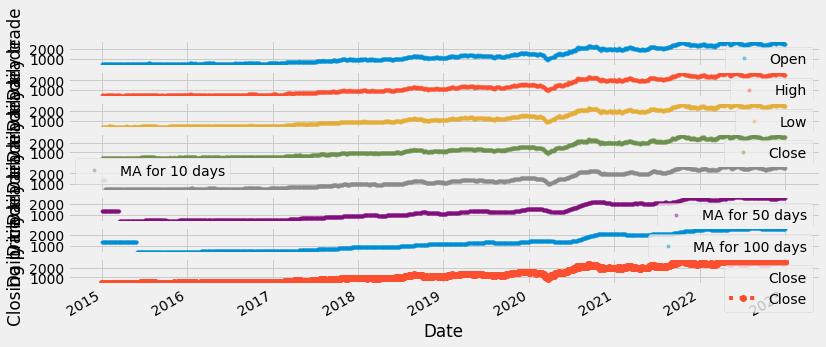

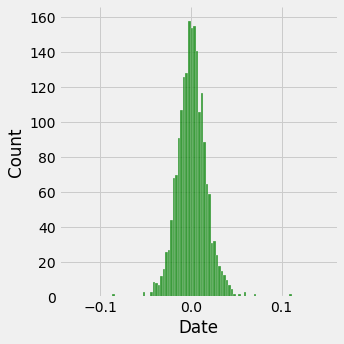

In [35]:
df.fillna(df.mean(), inplace=True)
df.head()



df.sort_index(axis=1,ascending=True)
cols_plot = ['Open', 'High', 'Low','Close','MA for 10 days','MA for 50 days','MA for 100 days','Close']
axes = df[cols_plot].plot(marker='.', alpha=0.4, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(df['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = df
print(df)

df.isnull().sum()

df['Date'] = df['Close'].pct_change()
# plot the daily  percentage
df['Close'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(df['Date'].dropna(),bins=100,color='green')
plt.show()

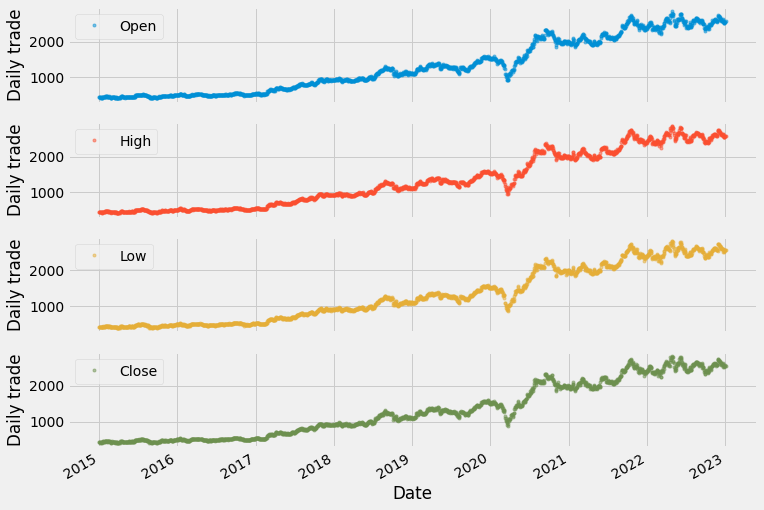

In [36]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

# Model Building

# LSTM (Long Short Term Memory)

In [37]:
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [38]:
# create a data frame with only the close column
data=df.filter(['Close'])
# convert data frame to a numpy array
dataset=data.values
# 80% of data given to train the model
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

1583

In [39]:
# scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01580162],
       [0.0153203 ],
       [0.01333358],
       ...,
       [0.88725459],
       [0.8991225 ],
       [0.88985977]])

In [40]:
# create training data set
# create scaled training data set
train_data=scaled_data[0:training_data_len,:]
# split into x train and y train
x_train =[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01580162, 0.0153203 , 0.01333358, 0.0051921 , 0.00891977,
       0.00641076, 0.01014868, 0.0081005 , 0.00663607, 0.00495656,
       0.0109577 , 0.01207395, 0.01411188, 0.0189046 , 0.01966241,
       0.01495163, 0.01559681, 0.01603716, 0.0196829 , 0.02430152,
       0.02140337, 0.01992869, 0.02598103, 0.02417863, 0.02313407,
       0.02030759, 0.01760401, 0.0145932 , 0.01842328, 0.02015398,
       0.02186421, 0.01885339, 0.01861786, 0.01869978, 0.01277033,
       0.00833605, 0.00628787, 0.00663607, 0.00640052, 0.0091758 ,
       0.0109577 , 0.01844376, 0.01579139, 0.01519741, 0.01206372,
       0.00991313, 0.00925773, 0.01086553, 0.00805954, 0.00642101,
       0.00944206, 0.0118589 , 0.00929869, 0.00887881, 0.00639028,
       0.00761918, 0.00699449, 0.00379935, 0.00019457, 0.        ])]
[0.0031234600229044507]

[array([0.01580162, 0.0153203 , 0.01333358, 0.0051921 , 0.00891977,
       0.00641076, 0.01014868, 0.0081005 , 0.00663607, 0.00495656,
       0.0109577 , 0.01207395, 0.

In [41]:
# convert x_train and y_train to numpy arrays so that they can be used to train lstm model
x_train,y_train=np.array(x_train),np.array(y_train)

In [42]:
# Reshape the data cause currently our data is in 2d but LSTM requires 3d
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#row,time,features
x_train.shape

(1523, 60, 1)

In [43]:
# building the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25)) 
model.add(Dense(1))

In [44]:
# compling model
model.compile(optimizer='adam',loss='mean_squared_error')
# loss function checks how well the model performs on test data
# optimizer is used to improve the loss function

In [45]:
# train model/
# batch size=total no of training examples present in a batch
# epoch is the number of iterations when a dataset is passed forward and backward in a neural network
model.fit(x_train,y_train,batch_size=1,epochs=1)

1523/1523 [==============================] - 25s 15ms/step - loss: 0.0019


In [46]:
#create testing dataset
# create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
# create datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:] #values to be tested upon
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0]) #past 60 values

In [47]:
# convert data to numpy array
x_test=np.array(x_test)

In [48]:
# reshape data(2d to 3d)
x_test=np.reshape(x_test,(x_test.shape[0],x_train.shape[1],1))#row,column,features

In [49]:
# get model's predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)#we want predictions to be same as y_test and we are predicting on the basis of x_test

13/13 [==============================] - 1s 9ms/step


In [50]:
# evaluate model using root mean squared error[RMSE]
# lower the RMSE,better the fit
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

35.28965430923655

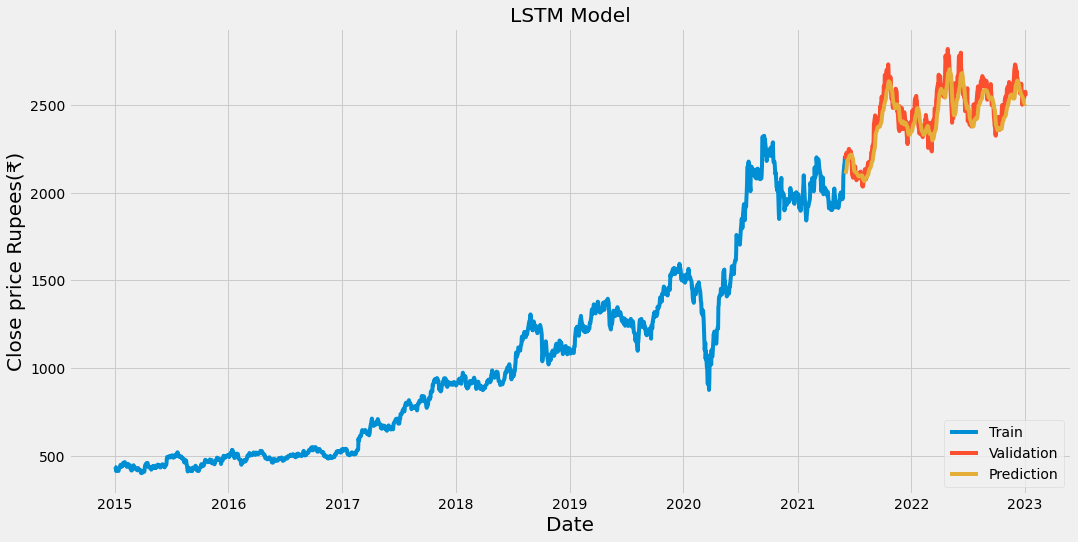

In [51]:
# plotting data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
# visualizing data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close price Rupees(₹)',fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Prediction'],loc='lower right')
plt.show()

In [52]:
# show the actual price and the predicted price
valid

,Close,Predictions
Date,,
2021-06-04,2190.500000,2108.429932
2021-06-07,2227.399902,2132.904785
2021-06-08,2214.600098,2155.657471
2021-06-09,2175.000000,2173.562744
2021-06-10,2183.000000,2183.026123
...,...,...
2022-12-28,2544.449951,2518.070557
2022-12-29,2543.300049,2512.015381
2022-12-30,2547.199951,2507.812012


In [53]:
# get quote
reliance_quote = pdr.get_data_yahoo('RELIANCE.NS', start='2015-01-01')
# creating a new dataframe
new_df=reliance_quote.filter(['Close'])
# getting next 30 days values and converting to array
next_30_days=new_df[30:].values
# scaling the value
next_30_days_scaled=scaler.transform(next_30_days)
X_test=[]
# appending the last 60 days scaled value
X_test.append(next_30_days_scaled)
# converting to numpy array
X_test=np.array(X_test)
# 2d to 3d
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# scaled predicted
pred_price=model.predict(X_test)
# unscaled predicted
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 1s 903ms/step
[[2508.8647]]


In [55]:
reliance_quote2 = pdr.get_data_yahoo('RELIANCE.NS', start='2023-01-01',end='2023-01-31')
print(reliance_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-01-02    2575.899902
2023-01-03    2553.949951
Name: Close, dtype: float64
